# Régression Régularisées : RIDGE


0. Importez les libairies usuelles 

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

  1. Chargez en mémoire le dataset des prix des logements à boston grâce à la commande :
  
 
```
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
```

In [42]:
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [44]:
boston_df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

  2. Créez un dataframe contenant les variables explicatives et un autre contenant uniquement la variable cible qui est le prix des maisons

In [45]:
y = pd.DataFrame(boston.target, columns=["prices"])
y.head()

,prices
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


3. Utilisez la commande `train_test_split ` du package `sklearn.model_selection`  afin de créer un échantillon d’entraînement contenant 70% des observations et un échantillon test contenant 30% des observations.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_df, y, test_size = 0.3)


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc_param = sc.fit(X_train)
X_train = pd.DataFrame(sc_param.transform(X_train))

X_test = sc_param.transform(X_test)

In [47]:
type(sc_param)

sklearn.preprocessing._data.StandardScaler

4. Générer un modèle de régression linéaire classique, un modèle ridge où alpha vaut 0.01 et un modèle ridge où alpha vaut 100.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

linear_regressor = LinearRegression()

ridge_regressor_small_alpha = Ridge(alpha = 0.01)

ridge_regressor_large_alpha = Ridge(alpha = 100)

5. Entraînez ces modèles sur les données sur les données d’apprentissage

In [48]:
linear_regressor.fit(X_train, y_train)

ridge_regressor_small_alpha.fit(X_train, y_train)

ridge_regressor_large_alpha.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

6. Produisez les scores de performance de ces trois modèles sur l’échantillon d’apprentissage et de validation grâce à l’attribut .score

In [49]:
print("Linear Regression score : {}".format(linear_regressor.score(X_test, y_test)))
print("Ridge with small Alpha score : {}".format(ridge_regressor_small_alpha.score(X_test, y_test)))
print("Ridge with large Alpha score : {}".format(ridge_regressor_large_alpha.score(X_test,y_test)))

Linear Regression score : 0.7086654326886886
Ridge with small Alpha score : 0.7086759086367327
Ridge with large Alpha score : 0.7153496277697052


7. Comparez les coefficients des trois modèle à l’aide d’un graphique, que remarquez vous ?

In [50]:
linear_regressor.coef_

array([[-1.06731016,  1.32554389,  0.4001703 ,  0.77484996, -2.35546267,
         3.0152262 ,  0.42750609, -3.13694686,  2.84142305, -1.93820746,
        -2.07391835,  0.90914005, -3.89851311]])

In [51]:
type(linear_regressor.coef_)

numpy.ndarray

In [52]:
linear_regressor.coef_[0]

array([-1.06731016,  1.32554389,  0.4001703 ,  0.77484996, -2.35546267,
        3.0152262 ,  0.42750609, -3.13694686,  2.84142305, -1.93820746,
       -2.07391835,  0.90914005, -3.89851311])

In [56]:
coef = pd.DataFrame() # on créé un dataframe pour analyser les coefficients
coef['features'] = boston_df.columns
coef['coef_linear_regressor'] = linear_regressor.coef_[0]
coef['coef_abs_linear_regressor'] = np.abs(linear_regressor.coef_[0])
coef['coef_ridge_small_alpha'] = ridge_regressor_small_alpha.coef_[0]
coef['coef_abs_ridge_small_alpha'] = np.abs(ridge_regressor_small_alpha.coef_[0])
coef['coef_ridge_large_alpha'] = ridge_regressor_large_alpha.coef_[0]
coef['coef_abs_ridge_large_alpha'] = np.abs(ridge_regressor_large_alpha.coef_[0])
coef

,features,coef_linear_regressor,coef_abs_linear_regressor,coef_ridge_small_alpha,coef_abs_ridge_small_alpha,coef_ridge_large_alpha,coef_abs_ridge_large_alpha
0,CRIM,-1.067310,1.067310,-1.067174,1.067174,-0.690068,0.690068
1,ZN,1.325544,1.325544,1.325196,1.325196,0.572378,0.572378
2,INDUS,0.400170,0.400170,0.399705,0.399705,-0.397792,0.397792
3,CHAS,0.774850,0.774850,0.774901,0.774901,0.747296,0.747296
4,NOX,-2.355463,2.355463,-2.355026,2.355026,-0.877864,0.877864
5,RM,3.015226,3.015226,3.015382,3.015382,2.982508,2.982508
6,AGE,0.427506,0.427506,0.427356,0.427356,0.017653,0.017653
7,DIS,-3.136947,3.136947,-3.136494,3.136494,-1.355249,1.355249
8,RAD,2.841423,2.841423,2.840127,2.840127,0.562938,0.562938
9,TAX,-1.938207,1.938207,-1.936909,1.936909,-0.337850,0.337850


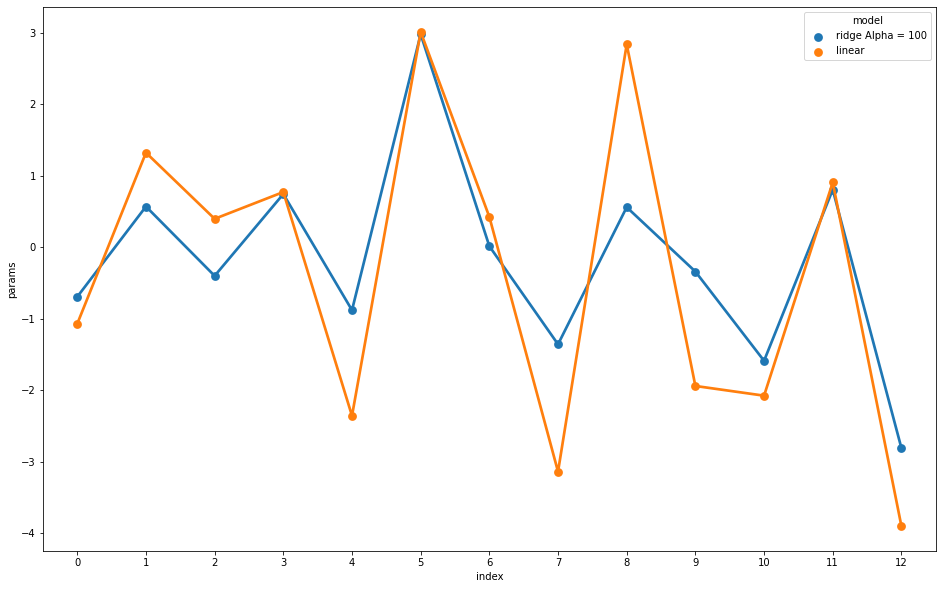

In [58]:
perf_ridge_large_alpha = pd.DataFrame({"params": ridge_regressor_large_alpha.coef_[0], 
                                       "model": "ridge Alpha = 100", 
                                       "index": range(0, len(boston_df.columns))})

perf_lin = pd.DataFrame({"params": linear_regressor.coef_[0], 
                                       "model": "linear", 
                                       "index": range(0, len(boston_df.columns))})

perf_compar = pd.concat([perf_ridge_large_alpha,perf_lin])

import seaborn as s
plt.figure(figsize=(16, 10))
s.pointplot(x = 'index',y = 'params',hue = 'model', data = perf_compar)

---> On remarque qu'on a pu pénaliser le coefficient lié à la Feature NOX pour en limiter son impact

8. Déterminez la valeur optimale de alpha (à 1 prêt) à l'aide de la fonction GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':np.arange(0,100,1)}
ridge = Ridge()

grid = GridSearchCV(ridge, param_grid=params, cv=10)

grid_fit = grid.fit(X_train, y_train)

In [62]:
params

{'alpha': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}

In [63]:
grid_fit.best_params_

{'alpha': 24}

In [64]:
grid_fit.best_estimator_.score(X_test,y_test)

0.7179286597172698

In [65]:
Ridge(alpha=0).fit(X_train,y_train).score(X_test,y_test)

0.7086654326886883

In [67]:
Ridge(alpha=24).fit(X_train,y_train).score(X_test,y_test)

0.7179286597172698

In [66]:
linear_regressor.score(X_test,y_test)

0.7086654326886886

le modele avec (alpha = 8) est mieux que l'autre de (alpha = 0)

In [0]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':np.arange(23,25,0.1)}
ridge = Ridge()

grid = GridSearchCV(ridge, param_grid=params, cv=10)
grid_fit = grid.fit(X_train, y_train)

In [69]:
grid_fit.best_params_

{'alpha': 24.200000000000017}

In [35]:
grid_fit.best_estimator_.score(X_test,y_test)

0.6909057040710065

In [0]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':np.arange(8.198,8.200,0.001)}
ridge = Ridge()

grid = GridSearchCV(ridge, param_grid=params, cv=10)
grid_fit = grid.fit(X_train, y_train)

In [39]:
grid_fit.best_params_

{'alpha': 8.198}

In [40]:
grid_fit.best_estimator_.score(X_test,y_test)

0.6909056957526369